# Identification
Please indicate your name and parcours (e.g.: IMA, DIGIT, BIM, DAC, ..., Erasmus)

Student 1: Defne Gulmez

Student 2: Yalda Eftekhari

# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [133]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [134]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [135]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [136]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [137]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [138]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [139]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [140]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [141]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [142]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [143]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('img/moon.jpg')


Array can be displayed as an image using Matplotlib module. Here a short example:

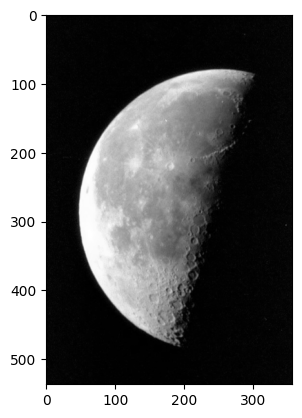

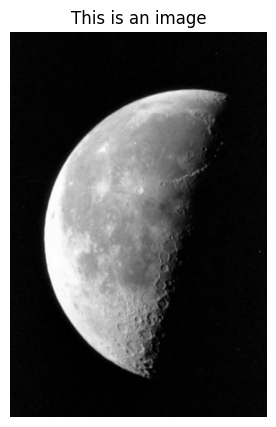

In [144]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html

## Exercise 1
In this exercise, we work with image `img/moon.png`. If possible give two solutions: one with loops (for, while, ...) and one without loops using Numpy arithmetic avoiding ad-hoc Numpy functions such as `np.where()`. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [145]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    myimage = np.array(Image.open(fname))
    return myimage

#For testing
openImage('img/moon.png')

array([[ 1,  3,  7, ...,  8, 16,  8],
       [ 3,  7,  3, ...,  4, 11, 12],
       [ 6,  4,  6, ...,  7,  2,  3],
       ...,
       [ 4,  8,  8, ...,  6,  4,  8],
       [ 4,  8,  8, ...,  4,  6,  6],
       [ 2,  3,  3, ...,  6,  9,  9]], dtype=uint8)

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [146]:
def countPixels(I,k):
    """ Array*int -> int"""
    number = 0
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i][j] == k:
                number += 1
    return number

#For Testing
image_testing = openImage('img/moon.png')
countPixels(image_testing, 8)

3213

3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [147]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    copy_of_I = I.copy() # To not change the I
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i][j] == k1:
                copy_of_I[i][j] = k2
    return copy_of_I

#For testing
replacePixels(image_testing, 8, 2) 
#We can see that all the 8's that could seen in the result of exercise 1 question 1 has been changed to 2.

array([[ 1,  3,  7, ...,  2, 16,  2],
       [ 3,  7,  3, ...,  4, 11, 12],
       [ 6,  4,  6, ...,  7,  2,  3],
       ...,
       [ 4,  2,  2, ...,  6,  4,  2],
       [ 4,  2,  2, ...,  4,  6,  6],
       [ 2,  3,  3, ...,  6,  9,  9]], dtype=uint8)

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

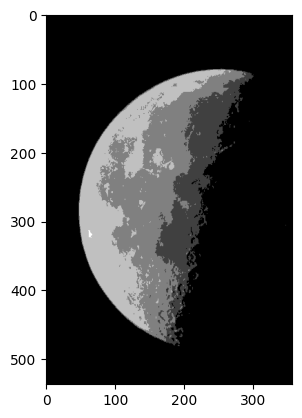

In [148]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    kmin = I.min()
    kmax = I.max()
    copy_of_I = I.copy()
    L = k2 - k1 + 1
    for i in range(copy_of_I.shape[0]):
        for j in range(I.shape[1]):
            copy_of_I[i][j] = ((L-1) * (copy_of_I[i][j] - kmin) / (kmax - kmin)) # Equation from the lecture slides
    return copy_of_I

#For testing
imagep = normalizeImage(image_testing, 1, 5)
plt.imshow(imagep)
plt.show()


5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

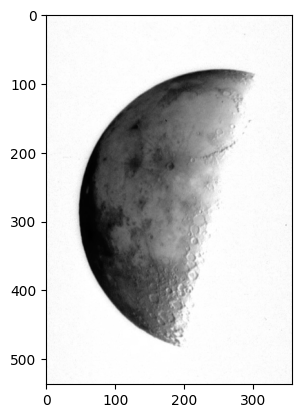

In [149]:
def inverteImage(I):
    """ Array -> Array """
    copy_of_I = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            copy_of_I[i][j] = 255 - copy_of_I[i][j]
    return copy_of_I

#For Testing
imagep = inverteImage(image_testing)
plt.imshow(imagep)
plt.show()
#We can clearly see that the image is inverted. For example, the background, which was previously black, has turned white.

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [150]:
def computeHistogram(I):
    """ Array -> list[int] """
    hist = [0] * (I.max()+1) #creating a list for putting the amount of each pixel value 
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            hist[I[i][j]] += 1
    return hist

#for testing
computeHistogram(image_testing)

#It is possible to use an already implemented function such as numpy's unique. However, this function also visits each pixel to count. 
#We just don't do it manuallly. 

[1459,
 20126,
 30924,
 25408,
 17167,
 11368,
 7369,
 4767,
 3213,
 2178,
 1486,
 993,
 632,
 488,
 371,
 301,
 255,
 217,
 201,
 202,
 190,
 165,
 168,
 140,
 160,
 157,
 129,
 136,
 140,
 135,
 137,
 121,
 137,
 114,
 127,
 129,
 115,
 132,
 123,
 124,
 101,
 91,
 122,
 116,
 129,
 109,
 108,
 116,
 113,
 123,
 109,
 140,
 101,
 109,
 114,
 117,
 140,
 127,
 140,
 142,
 129,
 134,
 192,
 160,
 179,
 165,
 170,
 154,
 155,
 159,
 164,
 184,
 166,
 180,
 169,
 132,
 153,
 171,
 165,
 156,
 166,
 142,
 151,
 179,
 159,
 154,
 167,
 166,
 179,
 163,
 195,
 198,
 181,
 216,
 230,
 231,
 250,
 256,
 264,
 291,
 245,
 242,
 279,
 247,
 261,
 304,
 287,
 286,
 296,
 286,
 292,
 296,
 285,
 312,
 274,
 312,
 282,
 308,
 296,
 267,
 273,
 304,
 327,
 263,
 286,
 282,
 272,
 246,
 238,
 227,
 243,
 225,
 239,
 233,
 242,
 248,
 258,
 262,
 263,
 309,
 338,
 336,
 324,
 318,
 335,
 326,
 327,
 316,
 314,
 293,
 313,
 328,
 292,
 300,
 296,
 326,
 341,
 312,
 336,
 326,
 362,
 357,
 384,
 382,
 

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

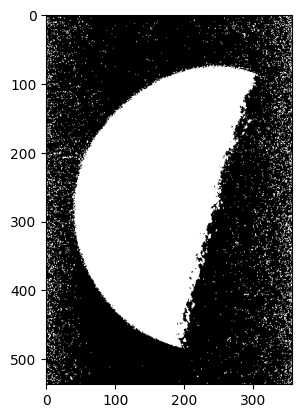

In [151]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    copy_of_image = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if copy_of_image[i][j] < s:
                copy_of_image[i][j] = 0
            else:
                copy_of_image[i][j] = 255
    return copy_of_image


#For testing
plt.imshow(thresholdImage(image_testing, 8))
plt.show()
#We can clearly see that the pixels consist of only 2 values.

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

Text(0.5, 1.0, 'Inverted Image Histogram')

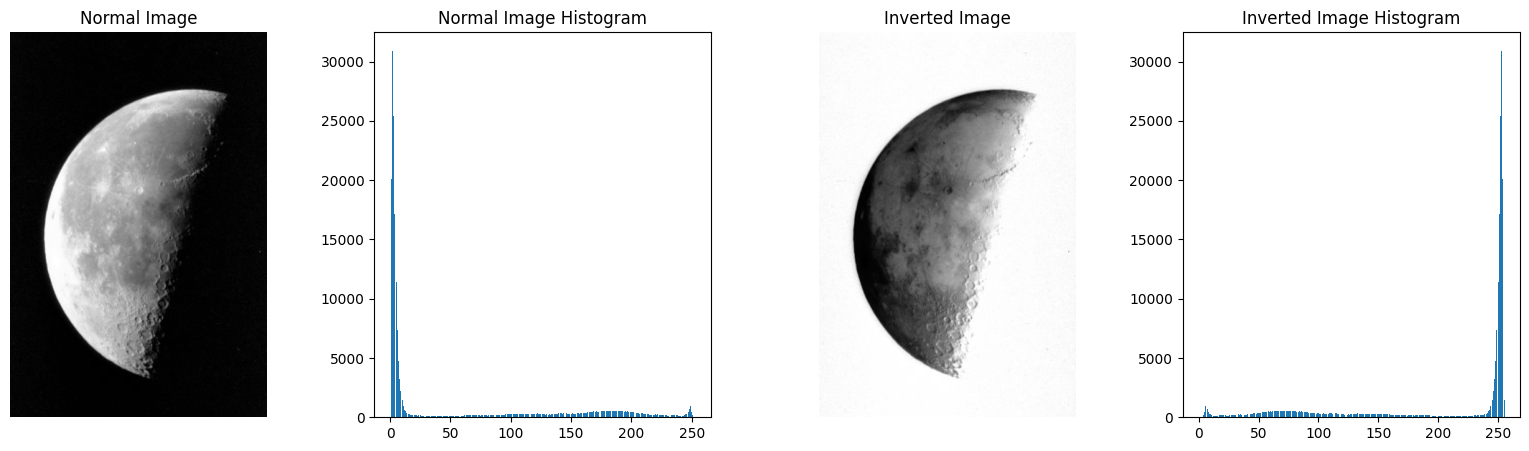

In [152]:

#Read and display Image
image2 = openImage('img/moon.png')
fig, ax =plt.subplots(1,4, figsize= (20,5))
ax[0].imshow(image2)
ax[0].axis('off')
ax[0].set_title('Normal Image')


#Plot the histogram
hist = computeHistogram(image2)
indices = list(range(len(hist)))
ax[1].bar(indices, hist)
ax[1].set_title('Normal Image Histogram')


#Inverted Image
inverted_image = inverteImage(image2)
ax[2].imshow(inverted_image)
ax[2].set_title('Inverted Image')
ax[2].axis('off')

#Inverted histogram
inverted_hist = computeHistogram(inverted_image)
indices = list(range(len(inverted_hist)))
ax[3].bar(indices, inverted_hist)
ax[3].set_title('Inverted Image Histogram')


9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

Text(0.5, 1.0, 'Normalized Image Histogram')

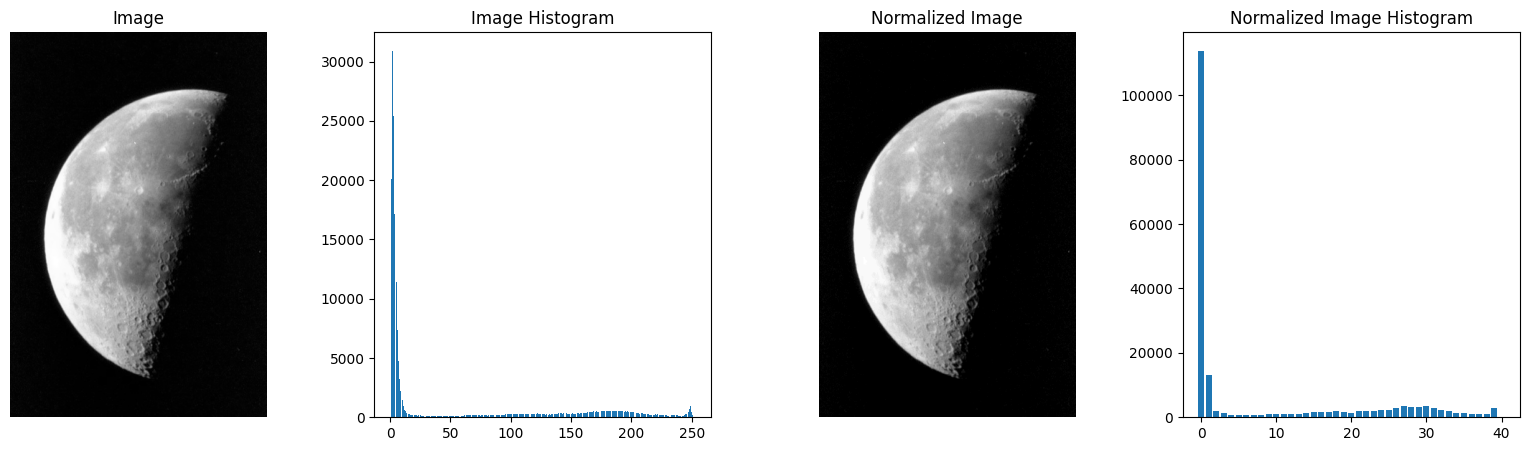

In [153]:
#Read and dislpay
image3 = openImage('img/moon.png')
fig, ax =plt.subplots(1,4, figsize= (20,5))
ax[0].imshow(image3)
ax[0].set_title('Image')
ax[0].axis('off')

#Plot the histogram
hist = computeHistogram(image3)
indices = list(range(len(hist)))
ax[1].bar(indices, hist)
ax[1].set_title('Image Histogram')

#normalize the image
normalized_image = normalizeImage(image3, 10, 50)
ax[2].imshow(normalized_image)
ax[2].set_title('Normalized Image')
ax[2].axis('off')

#normalized image histogram
hist = computeHistogram(normalized_image)
indices = list(range(len(hist)))
ax[3].bar(indices, hist)
ax[3].set_title('Normalized Image Histogram')


10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

Text(0.5, 1.0, 'Threshold Image Histogram')

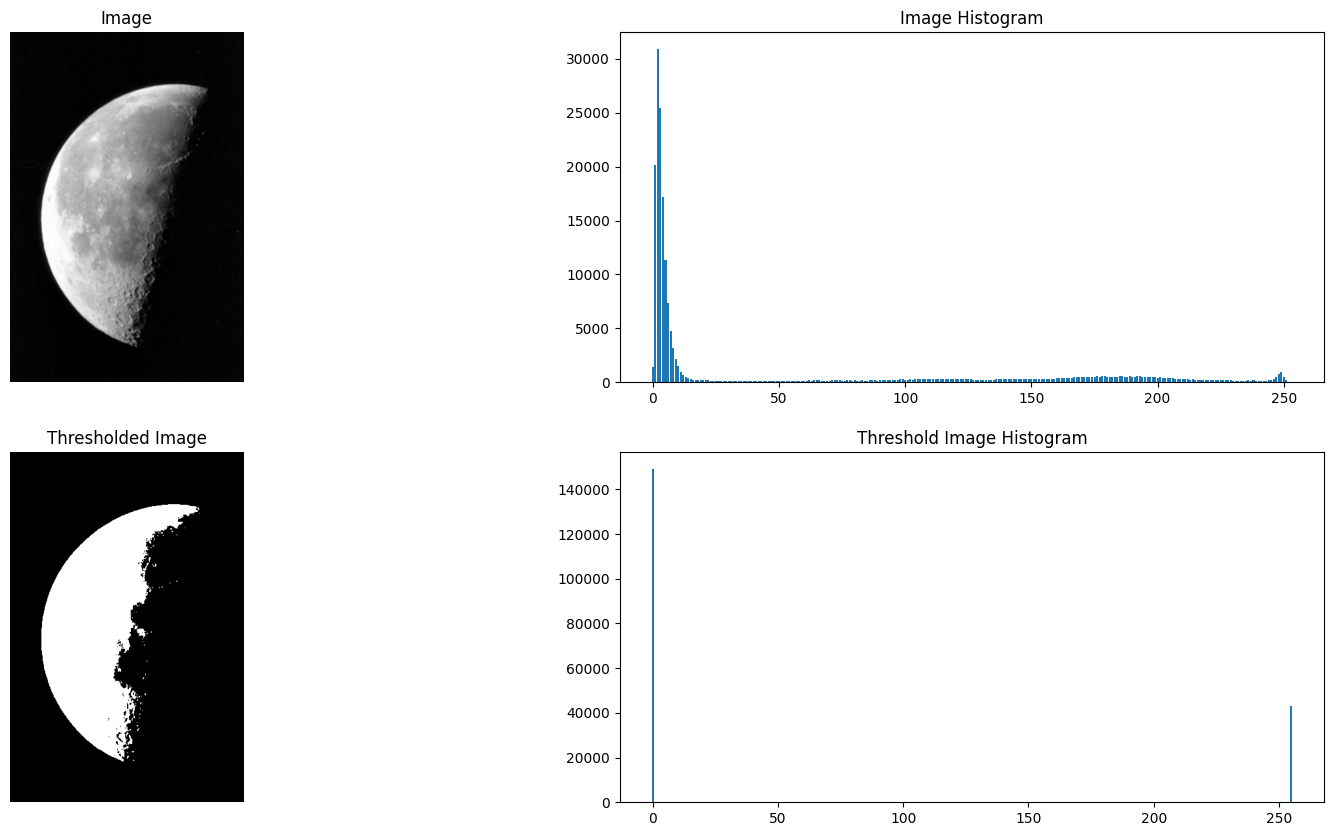

In [154]:
#Read and dislpay
image4 = openImage('img/moon.png')
fig, ax =plt.subplots(2,2, figsize= (20,10))
ax[0][0].imshow(image4)
ax[0][0].set_title('Image')
ax[0][0].axis('off')

#Plot the histogram
hist = computeHistogram(image4)
indices = list(range(len(hist)))
ax[0][1].bar(indices, hist)
ax[0][1].set_title('Image Histogram')

#Treshold Image
thresholded_image = thresholdImage(image4, 127)
ax[1][0].imshow(thresholded_image)
ax[1][0].set_title('Thresholded Image')
ax[1][0].axis('off')

#Treshold Image Histogram
histTreshold = computeHistogram(thresholded_image)
indices = list(range(len(histTreshold)))
ax[1][1].bar(indices, histTreshold)
ax[1][1].set_title('Threshold Image Histogram')


## Exercise 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 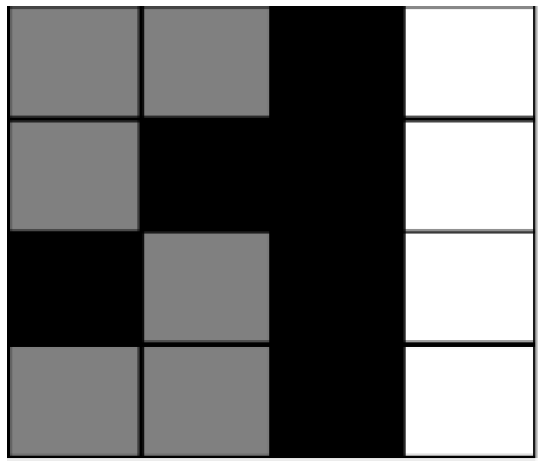 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

Text(0.5, 1.0, 'Threshold Image Histogram')

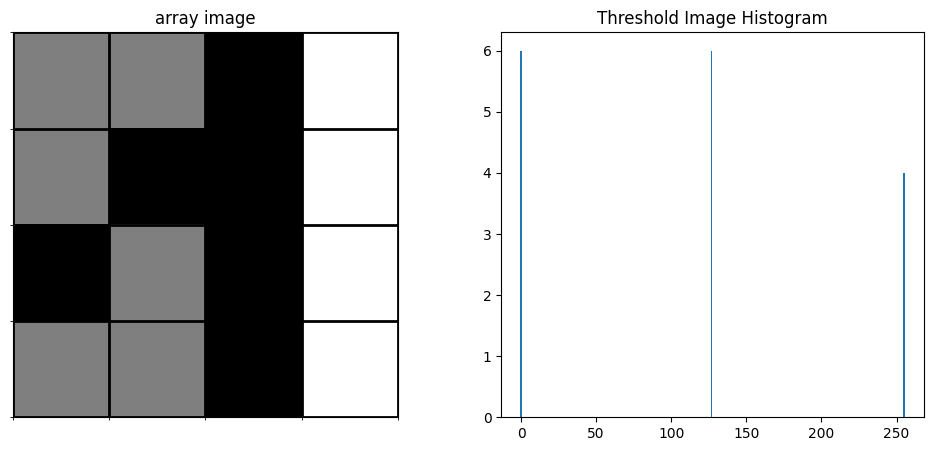

In [155]:
array = np.array([[127, 127, 0, 255],[127,0, 0, 255],[0,127,0, 255],[127,127,0,255]])
hist = computeHistogram(array)

fig, ax =plt.subplots(1,2, figsize= (12,5))
#array image
ax[0].imshow(array)
ax[0].set_title('array image')
ax[0].axis('on')
#adding grids to show image better(like the given example) but these parts can be removed and ax[0].imshow(array) is also okay
#np.arange(array.shape[1] + 1) generates an array of values from 0 to the number of columns in array+1. For a 4 column array, this will create values [0, 1, 2, 3, 4].
#- 0.5 adjusts the ticks to be positioned between the columns here: at 0.5, 1.5, 2.5, 3.5
#minor=True indicates that these ticks are minor ticks. Minor ticks can be used for the grid lines without affecting the major ticks.                                                                            
ax[0].set_xticks(np.arange(array.shape[1] + 1) - 0.5, minor=True)
ax[0].set_yticks(np.arange(array.shape[0] + 1) - 0.5, minor=True)
# Add grid lines
ax[0].grid(which='minor', color='black', linestyle='-', linewidth=2)
# remove axis numbers
ax[0].set_xticks([])
ax[0].set_yticks([])

#plot histogram
indices = list(range(len(hist)))
ax[1].bar(indices, hist)
ax[1].set_title('Threshold Image Histogram')


2. We want to generate an image having random values. Functions `rand()` and `randn()` from  `numpy.random` module generate an array of given shapes with random values following a uniform distribution on $[0,1[$ and a normal distribution respectively. Create an array of shape 512 by 512 having **integer** elements following a uniform distribution in the set $\{0,1,\cdots,255\}$. We also want to create an array following a Gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histograms. Discuss the results.

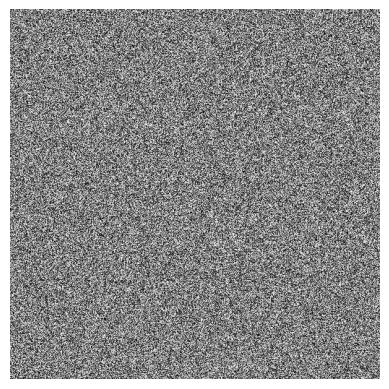

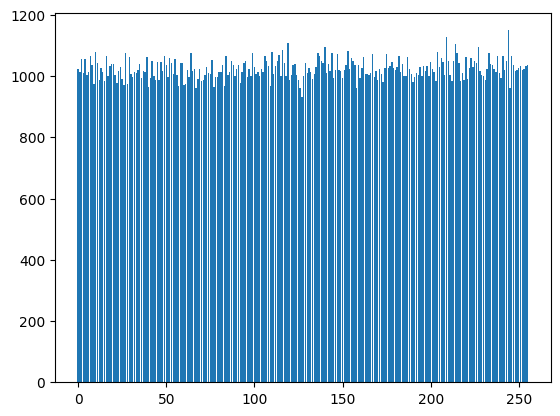

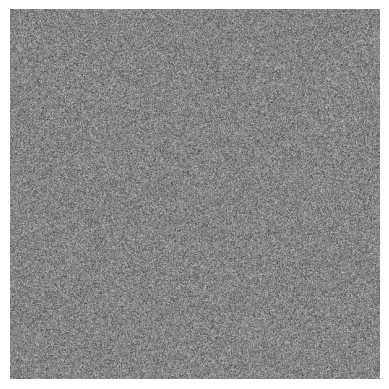

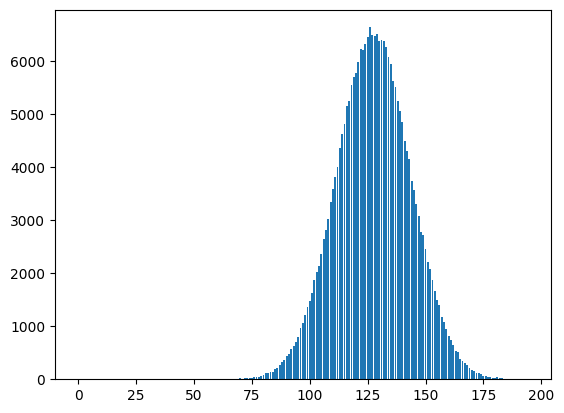

In [156]:
# Uniform distribution image
uniform_image = np.random.randint(0, 256, size=(512, 512))
plt.imshow(uniform_image)
plt.axis('off') 
plt.show()

# Uniform distribution image histogram
uniform_hist = computeHistogram(uniform_image)
indices = list(range(len(uniform_hist)))
plt.bar(indices, uniform_hist)
plt.show()

# Gaussian distribution image
gaussian_image = np.random.randn(*(512, 512)) * 16 + 128
gaussian_image = np.clip(gaussian_image, 0, 255).astype(np.uint8)  # convert the values to integer to be able to handle the histogram later
plt.imshow(gaussian_image)
plt.axis('off') 
plt.show()

# Gaussian distribution image histogram 
gaussian_hist = computeHistogram(gaussian_image)
indices = list(range(len(gaussian_hist)))
plt.bar(indices, gaussian_hist)
plt.show()

# We can see that the gaussian image forms a more smooth image, due to the values near the mean appearing much more frequently
# while the uniform image has all values spread evenly across the entire range, which causes the image to be less smooth.
# We can also see the uniform and guassian distibutions on the histograms, where the uniform histogram is almost flat across the whole range
# and the Gaussian histogram is shaped like a bell curve  

## Exercise 3: image manipulation
In this exercise, we work with image `img/pout.png`. 

1. Read and display this image

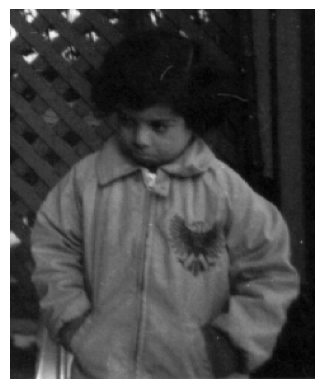

In [157]:
image = openImage('img/pout.png')
plt.imshow(image)
plt.axis('off') 
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

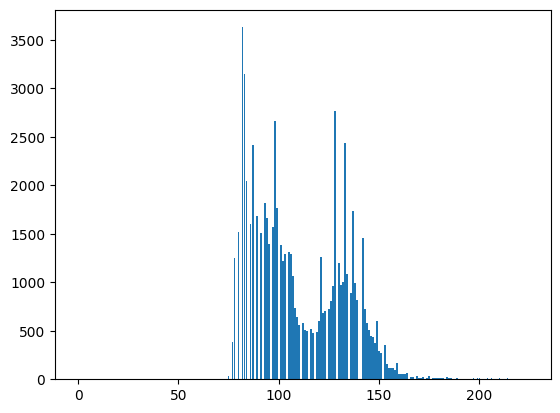

(74, 224)

In [158]:
#histogram
hist = computeHistogram(image)
indices = list(range(len(hist)))
plt.bar(indices, hist)
plt.show()

# extrema of the image
np.min(image), np.max(image)

#intensity rate is quite limited, showing that the image contains reduced contrast, which causes the image to look faded or old.


3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

Text(0.5, 1.0, 'Equalized Image')

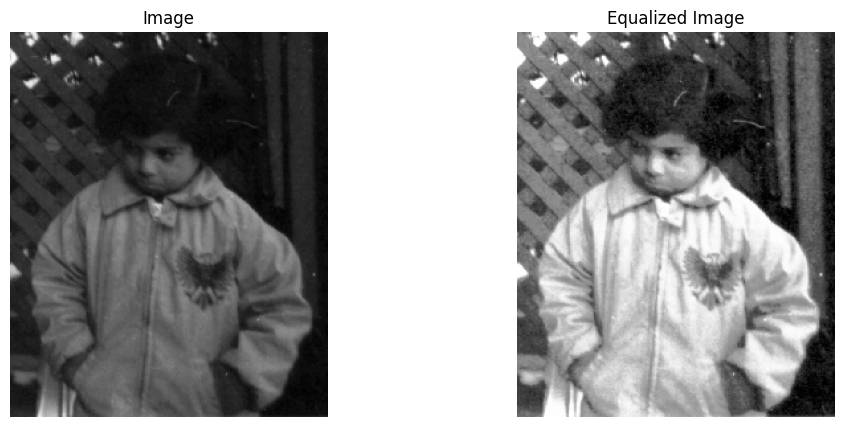

In [159]:
# function for creating the cumulative histogram. Seperated for the sake of better readability.
def cumulativeHist(hist):
    """Takes a histogram and computes the cumulative histogram."""
    cumulative_hist = [0] * len(hist)
    cumulative_hist[0] = hist[0]
    for i in range(1, len(hist)):
        cumulative_hist[i] = cumulative_hist[i - 1] + hist[i]
    return cumulative_hist


def histogramEqualization(I, h):
    """Array * list[int] -> Array
    Performs histogram equalization on image I using histogram h.
    """
    
    # Finding the cumulative histogram
    cum_hist = cumulativeHist(h)
    
    L = I.max() + 1
    N, M = I.shape 
    k_new = np.zeros_like(I) 
    
    # histogram equalization transformation
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            k = I[i][j]  
            # Transformation formula from the slides
            k_new[i][j] = int((L - 1) * cum_hist[k] / (N * M))
    
    return k_new

#For testing the results
equalized_image = histogramEqualization(image, computeHistogram(image))

fig, ax =plt.subplots(1,2, figsize= (12,5))

# Normal image
ax[0].imshow(image)
ax[0].axis('off') 
ax[0].set_title('Image')

# Equalized image
ax[1].imshow(equalized_image)
ax[1].axis('off') 
ax[1].set_title('Equalized Image')

# We can see the equalized image has better contrast which enhances visibility. 

    